In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.datasets import make_classification

In [13]:
file=pd.read_csv("C:\\Users\\91755\\Desktop\\Excelr Assignments\\KNN\\KNN\\Zoo.csv")
file

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [50]:
file = pd.DataFrame({
    "animal_name": ["aardvark", "antelope", "bass", "bear", "boar", "wallaby", "wasp", "wolf", "worm", "wren"],
    "hair": [1, 1, 0, 1, 1, 1, 1, 1, 0, 0],
    "feathers": [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    "eggs": [0, 0, 1, 0, 0, 0, 1, 0, 1, 1],
    "milk": [1, 1, 0, 1, 1, 1, 0, 1, 0, 0],
    "airborne": [0, 0, 0, 0, 0, 0, 1, 0, 0, 1],
    "aquatic": [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    "predator": [1, 0, 1, 1, 1, 0, 0, 1, 0, 0],
    "toothed": [1, 1, 1, 1, 1, 1, 0, 1, 0, 0],
    "backbone": [1, 1, 1, 1, 1, 1, 0, 1, 0, 1],
    "breathes": [1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
    "venomous": [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    "fins": [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    "legs": [4, 4, 0, 4, 4, 2, 6, 4, 0, 2],
    "tail": [0, 1, 1, 0, 1, 1, 0, 1, 0, 1],
    "domestic": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "catsize": [1, 1, 0, 1, 1, 1, 0, 1, 0, 0],
    "type": [1, 1, 4, 1, 1, 1, 6, 1, 7, 2]
}) 
file

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
6,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
7,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
8,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
9,wren,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2


In [52]:
file = file.drop(columns=["animal_name"])
file

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
6,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
7,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
8,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
9,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2


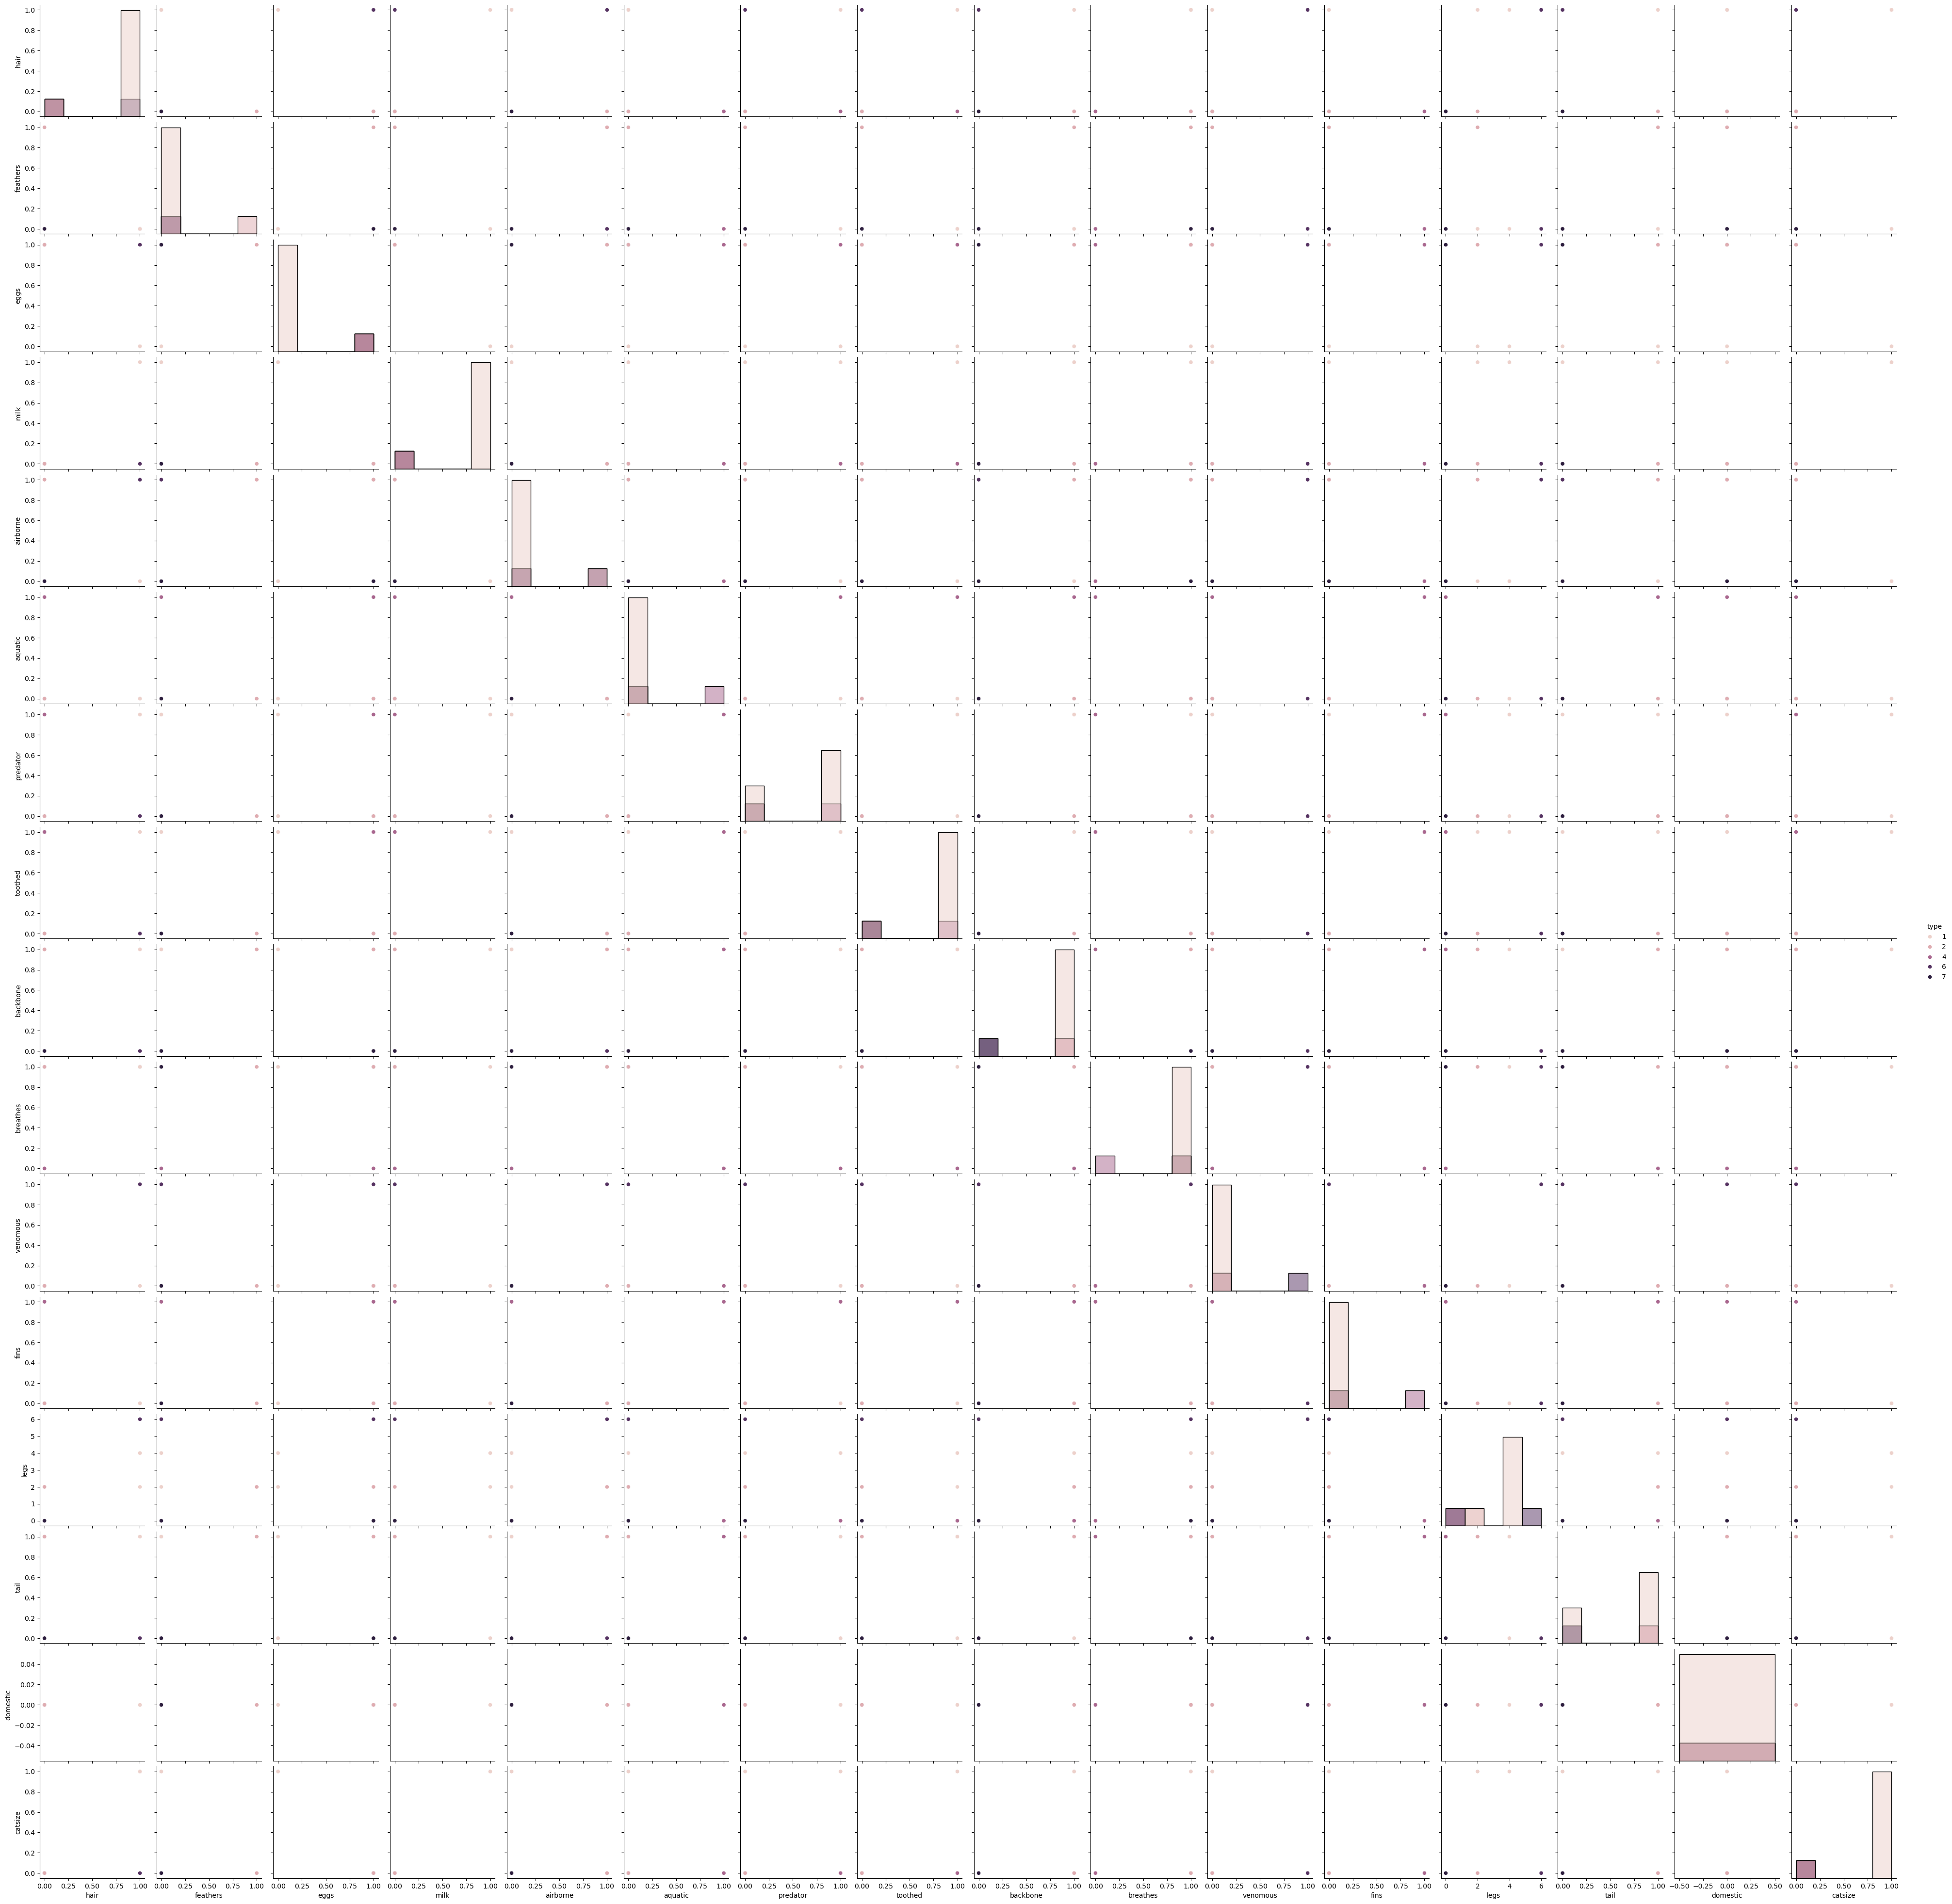

In [64]:
# 1. Analyze the data using visualizations
sns.pairplot(file,hue="type" ,diag_kind="hist")
plt.show()

In [68]:
#2. Preprocess the data by handling missing values & Outliers, if any.
print(file.isnull().sum())

hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator    0
toothed     0
backbone    0
breathes    0
venomous    0
fins        0
legs        0
tail        0
domestic    0
catsize     0
type        0
dtype: int64


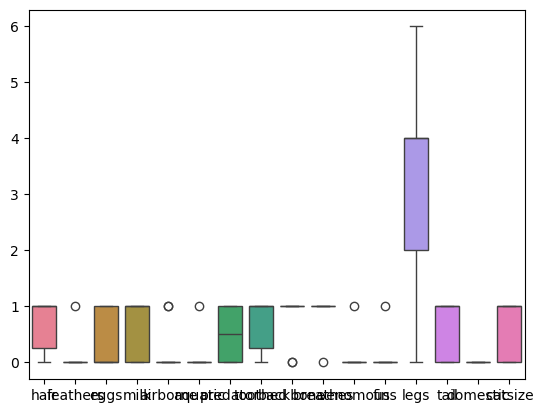

In [70]:
sns.boxplot(data=file.iloc[:,:-1])
plt.show()

In [82]:
model=StandardScaler()
X=pd.DataFrame(model.fit_transform(file.iloc[:,:-1]),columns=file.columns[:-1])
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,0.654654,-0.333333,-0.816497,0.816497,-0.5,-0.333333,1.0,0.654654,0.5,0.333333,-0.333333,-0.333333,0.542326,-1.224745,0.0,0.816497
1,0.654654,-0.333333,-0.816497,0.816497,-0.5,-0.333333,-1.0,0.654654,0.5,0.333333,-0.333333,-0.333333,0.542326,0.816497,0.0,0.816497
2,-1.527525,-0.333333,1.224745,-1.224745,-0.5,3.000000,1.0,0.654654,0.5,-3.000000,-0.333333,3.000000,-1.626978,0.816497,0.0,-1.224745
3,0.654654,-0.333333,-0.816497,0.816497,-0.5,-0.333333,1.0,0.654654,0.5,0.333333,-0.333333,-0.333333,0.542326,-1.224745,0.0,0.816497
4,0.654654,-0.333333,-0.816497,0.816497,-0.5,-0.333333,1.0,0.654654,0.5,0.333333,-0.333333,-0.333333,0.542326,0.816497,0.0,0.816497
5,0.654654,-0.333333,-0.816497,0.816497,-0.5,-0.333333,-1.0,0.654654,0.5,0.333333,-0.333333,-0.333333,-0.542326,0.816497,0.0,0.816497
6,0.654654,-0.333333,1.224745,-1.224745,2.0,-0.333333,-1.0,-1.527525,-2.0,0.333333,3.000000,-0.333333,1.626978,-1.224745,0.0,-1.224745
7,0.654654,-0.333333,-0.816497,0.816497,-0.5,-0.333333,1.0,0.654654,0.5,0.333333,-0.333333,-0.333333,0.542326,0.816497,0.0,0.816497
8,-1.527525,-0.333333,1.224745,-1.224745,-0.5,-0.333333,-1.0,-1.527525,-2.0,0.333333,-0.333333,-0.333333,-1.626978,-1.224745,0.0,-1.224745
9,-1.527525,3.000000,1.224745,-1.224745,2.0,-0.333333,-1.0,-1.527525,0.5,0.333333,-0.333333,-0.333333,-0.542326,0.816497,0.0,-1.224745


In [84]:
y=file["type"]
y

0    1
1    1
2    4
3    1
4    1
5    1
6    6
7    1
8    7
9    2
Name: type, dtype: int64

In [86]:
#3 Split the dataset into training and testing sets (80% training, 20% testing).
X_train , X_test ,y_train ,y_test=train_test_split(X,y,test_size=0.2 ,random_state=42)
X_train , X_test ,y_train ,y_test

(       hair  feathers      eggs      milk  airborne   aquatic  predator  \
 5  0.654654 -0.333333 -0.816497  0.816497      -0.5 -0.333333      -1.0   
 0  0.654654 -0.333333 -0.816497  0.816497      -0.5 -0.333333       1.0   
 7  0.654654 -0.333333 -0.816497  0.816497      -0.5 -0.333333       1.0   
 2 -1.527525 -0.333333  1.224745 -1.224745      -0.5  3.000000       1.0   
 9 -1.527525  3.000000  1.224745 -1.224745       2.0 -0.333333      -1.0   
 4  0.654654 -0.333333 -0.816497  0.816497      -0.5 -0.333333       1.0   
 3  0.654654 -0.333333 -0.816497  0.816497      -0.5 -0.333333       1.0   
 6  0.654654 -0.333333  1.224745 -1.224745       2.0 -0.333333      -1.0   
 
     toothed  backbone  breathes  venomous      fins      legs      tail  \
 5  0.654654       0.5  0.333333 -0.333333 -0.333333 -0.542326  0.816497   
 0  0.654654       0.5  0.333333 -0.333333 -0.333333  0.542326 -1.224745   
 7  0.654654       0.5  0.333333 -0.333333 -0.333333  0.542326  0.816497   
 2  0.6546

In [88]:
#. Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset
k=5
knn=KNeighborsClassifier(n_neighbors=k, metric="euclidean")
knn.fit(X_train, y_train)
knn

KNeighborsClassifier(metric='euclidean')

In [90]:
#5. Choose an appropriate distance metric and value for K.
y_pred = knn.predict(X_test)
y_pred

array([1, 1], dtype=int64)

In [96]:
#Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.
if X.shape[1] == 2:
    def plot_decision_boundaries(X, y, model, title):
        x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
        y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.figure(figsize=(10, 6))
        plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
        plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolor="k", cmap=plt.cm.Paired)
        plt.title(title)
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.show()

    plot_decision_boundaries(X, y, knn, f"KNN Decision Boundary (K={k})")
else:
    print("Decision boundaries cannot be visualized as the feature count > 2.")

Decision boundaries cannot be visualized as the feature count > 2.


In [ ]:
Interview Questions:
1. What are the key hyperparameters in KNN?
-->Number of Neighbors (k): Determines how many neighbors to consider.
-->Distance Metric: Euclidean, Manhattan, Minkowski, etc.
-->Weights: Uniform (equal weight) or distance-based (closer neighbors have more influence).
-->Algorithm: brute, kd_tree, ball_tree, or auto.
-->Leaf Size: Impacts tree-based search efficiency.
-->p: Power parameter for Minkowski distance 

2. What distance metrics can be used in KNN?
-->Euclidean: Straight-line distance.
-->Manhattan: Sum of absolute differences.
-->Minkowski: Generalized distance .
-->Cosine: Angle-based similarity.
-->Hamming: For categorical or binary data.
-->Chebyshev: Maximum absolute difference.
-->Mahalanobis: Accounts for feature correlations.